In [1]:
# Dependencies and Setup
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from graph import autolabel            #function for labeling the graph

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_file = "Resources/mouse_drug_data.csv"
clinical_trial_file = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_file)
clinical_df=pd.read_csv(clinical_trial_file)

# Combine the data into a single dataset
mouse_clinical_df=pd.merge(mouse_df,clinical_df,on ="Mouse ID",how="left")
# Display the data table for preview
mouse_clinical_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
ave_tumor_vol=mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
ave_tumor_df=pd.DataFrame(ave_tumor_vol)
# Preview DataFrame
ave_tumor_df=ave_tumor_df.reset_index(drop=False)
ave_tumor_df=ave_tumor_df.rename(columns={"Tumor Volume (mm3)":"Ave Tumor Vol"})
ave_tumor_df.head(2)

,Drug,Timepoint,Ave Tumor Vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol =mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_df =pd.DataFrame(sem_tumor_vol)
# Preview DataFrame
sem_tumor_df=sem_tumor_df.reset_index(drop=False)
sem_tumor_df=sem_tumor_df.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Vol"})
sem_tumor_df.head(2)

,Drug,Timepoint,SEM Tumor Vol
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593


In [4]:
#count for reformat of all data
drug_list=ave_tumor_df["Drug"].unique()
time_list=ave_tumor_df["Timepoint"].unique()


In [5]:
#function def for data reformatting
"""
reformat a input_df dataframe 
  drug_list unique values of column 0  passed to become column headings
  time_list- unique values of column 1 passed to become the index 
  column_head heading for the input column to fill in values drug, time pair 
  returning output_df 
"""
def minor_mung (time_list,drug_list,input_df,column_head):
    output_df=pd.DataFrame(index=time_list,columns=drug_list) #add index/column to dataframe
    for drug in drug_list:
        output_df[drug]=input_df[column_head].loc[input_df["Drug"]== drug].values
    return output_df

In [8]:
# Minor Data Munging to Re-Format the AVERAGE TUMOR VOL Data Frames
new_tumor_ave=minor_mung(time_list,drug_list,ave_tumor_df,"Ave Tumor Vol")
new_tumor_ave.head()   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [9]:
# Minor Data Munging to Re-Format the TUMOR VOL SEM Data Frames
new_tumor_sem=minor_mung(time_list,drug_list,sem_tumor_df,"SEM Tumor Vol")
new_tumor_sem.head()   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


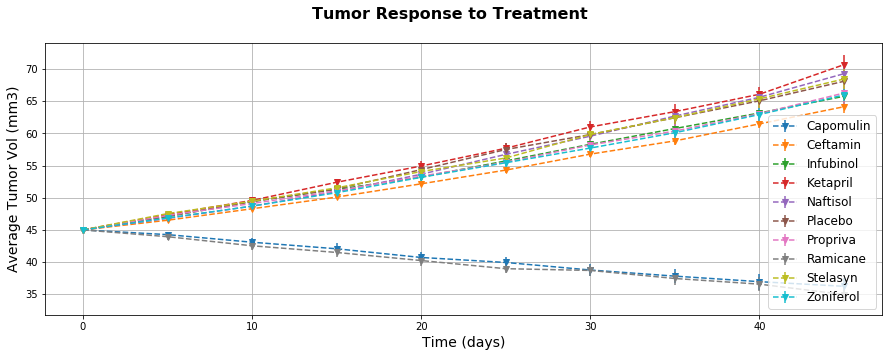

In [23]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize=(15,5))

fig.suptitle("Tumor Response to Treatment",fontsize=16,fontweight="bold")
for drug in drug_list:
    ax.errorbar(time_list,new_tumor_ave[drug],yerr=new_tumor_sem[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Average Tumor Vol (mm3)",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)
# Save the Figure
fig.savefig("TumorResponse.png")

In [11]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ave_met_site=mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
ave_met_site_df=pd.DataFrame(ave_met_site)
ave_met_site_df=ave_met_site_df.reset_index(drop=False)
ave_met_site_df=ave_met_site_df.rename(columns={"Metastatic Sites":"Ave Met Sites"})
#preview dataframe
ave_met_site_df.head(2)

,Drug,Timepoint,Ave Met Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_met_site =mouse_clinical_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
sem_met_site_df =pd.DataFrame(sem_met_site)
# Preview DataFrame
sem_met_site_df=sem_met_site_df.reset_index(drop=False)
sem_met_site_df=sem_met_site_df.rename(columns={"Metastatic Sites":"SEM Met Sites"})
sem_met_site_df.head(2)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833


In [18]:
# Minor Data Munging to Re-Format Mean Met. Site Data Frames
new_met_site_ave=minor_mung(time_list,drug_list,ave_met_site_df,"Ave Met Sites")
# Preview that Reformatting worked  
new_met_site_ave.head(2)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [20]:
# Minor Data Munging to Re-Format SEM Met. Site Data Frames
new_met_site_sem=minor_mung(time_list,drug_list,sem_met_site_df,"SEM Met Sites")
new_met_site_sem.head(2)   

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


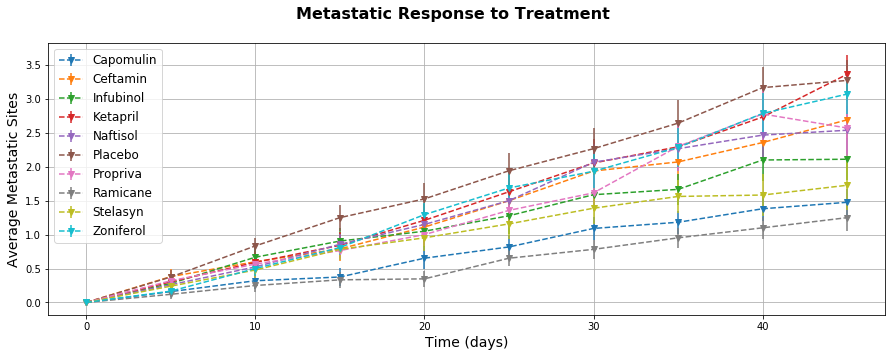

In [26]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize=(15,5))
fig.suptitle("Metastatic Response to Treatment",fontsize=16,fontweight="bold")
for drug in drug_list:
    ax.errorbar(time_list,new_met_site_ave[drug],yerr=new_met_site_sem[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Average Metastatic Sites",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)  
# Save the Figure
fig.savefig("MetastaticResponse.png")
# Show the Figure
plt.show()

## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=mouse_clinical_df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
mouse_count_df=pd.DataFrame(mouse_count)
mouse_count_df=mouse_count_df.reset_index(drop=False)
mouse_count_df=mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
# Minor Data Munging to Re-Format the Data Frames
new_mouse_count=minor_mung(time_list,drug_list,mouse_count_df,"Mouse Count")
# Preview the Data Frame
new_mouse_count.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


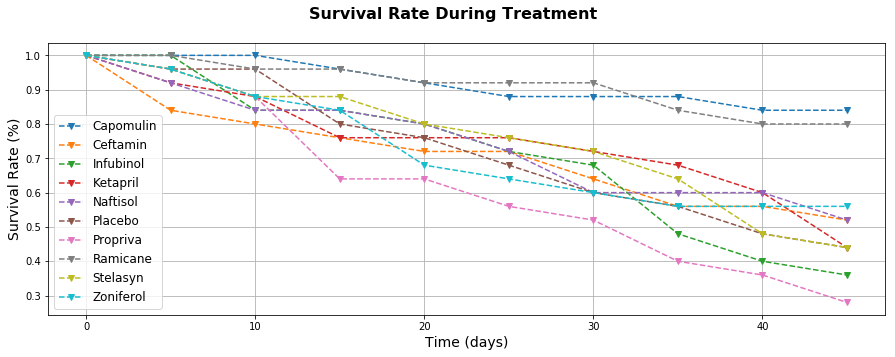

In [30]:
# Generate the Plot (Accounting for percentages)
mouse_percent=new_mouse_count /25
fig,ax=plt.subplots(figsize=(15,5))
fig.suptitle("Survival Rate During Treatment",fontsize=16, fontweight="bold")

for drug in drug_list:
    ax.plot(time_list,mouse_percent[drug],marker='v',linestyle='--',label=drug)
ax.set_xlabel("Time (days)",fontsize=14)
ax.set_ylabel("Survival Rate (%)",fontsize=14)
ax.grid()
ax.legend(loc="best",fontsize=12)  
# Save the Figure
fig.savefig("SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
percent_change=((new_tumor_ave.iloc[len(drug_list)-1,:] -new_tumor_ave.iloc[0,:])/new_tumor_ave.iloc[0,:])*100
# Display the data to confirm
percent_change_df=pd.DataFrame(percent_change)
percent_change_df.head(10)

,0
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


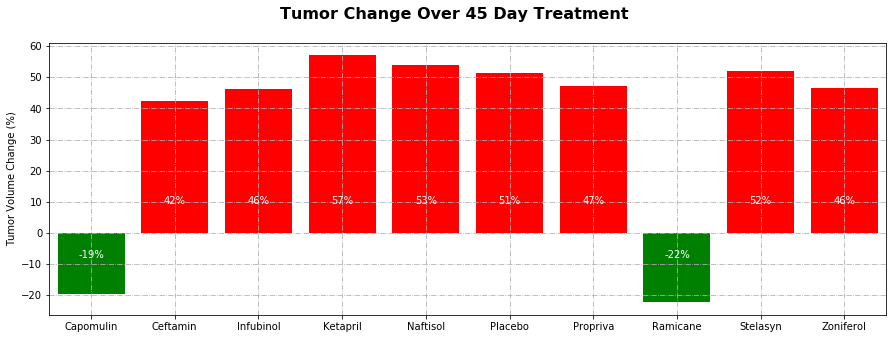

In [36]:
#assuming passing means <0 growth this resutls in green color on graph
#fail grade means >0 growth and red color on graph
# Splice the data between passing and failing drugs
bins=[-50,0,100]
group_names=["green","red"]
percent_change_df["pass/fail"]=pd.cut(percent_change_df[0],bins,labels=group_names)
x_axis=np.arange(len(drug_list))

# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots(figsize=(15,5))
bar_g=ax.bar(x_axis,percent_change_df[0],color=percent_change_df["pass/fail"],align="center")
fig.suptitle("Tumor Change Over 45 Day Treatment",fontsize=16,fontweight='bold')
ax.set_ylabel("Tumor Volume Change (%)")

ax.set_xticks(x_axis)
ax.set_xticklabels(drug_list)
ax.grid(linestyle='-.')
ax.set_xlim(-.5, len(drug_list)-0.5)
# Use functions to label the percentages of changes
#function defined in graph.py

# Call function from my graph.py 
autolabel(bar_g,ax)

# Save the Figure
fig.savefig("TumorPercentChange.png")
# Show the Figure 
fig.show()